# AirbnbPricePrediction

## Table of Contents
1. Project Preparation
   - 1.1 Defining the problem and project goals.
   - 1.2 Hypothesis

2. Data Cleaning
   - 2.1 Imports
      - 2.1.1 Import libraries
      - 2.1.2 Import dataset
   - 2.2 Variable Identification
   - 2.3 Remove duplicates
   - 2.4 Remove values errors
   - 2.5 Outliers Treatment
   - 2.6 Handle Missing Values
   - 2.7 Drop Unnecessary Columns

3. Exploratory Data Analysis
   - 3.1 Initial Exploration
   - 3.2 Univariate Analysis
   - 3.3 Bivariate Analysis
      - 3.3.1 Numerical-Numerical Variable
      - 3.3.2 Categorical-Numerical Variable

4. Data Preprocessing
   - 4.1 Transformation of Distributions
   - 4.2 Feature Engineering
      - 4.2.1 Creating New Features
      - 4.2.2 Feature Scaling
      - 4.2.3 Encoding Categorical Variables
         - 4.2.3.1 Label Encoding
         - 4.2.3.2 One Hot Encoding
   - 4.3 Data Splitting (Train-Test-Validation)

5. The model
   - 5.1 Model Building
   - 5.2 Model Training
   - 5.3 Model Evaluation
      - 5.3.1 K-Fold Cross Validation
      - 5.3.2 Hyperparameter Tunning
      - 5.3.3 Re-train with optimal hyperparameters for predictions
      - 5.3.4 Feature Importance
      - 5.3.5 Learning Curves
   - 5.4 Test the model on Test Set

6. Conclusion
   - 6.1 Results of the project / Validating hypothesis
   - 6.2 Improvements
   - 6.3 Conclusion on the project / course

## 1. Project Preparation
...
### 1.1 Defining the problem and project goals
...
### 1.2 Hypothesis
...


## 2. Data Cleaning
...
### 2.1 Imports
#### 2.1.1 Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

#### 2.1.2 Import dataset

In [3]:
dataset = pd.read_csv('./data/airbnb-listings.csv', sep=";")

C:\Users\charp\AppData\Local\Temp\ipykernel_13692\511297216.py:1: DtypeWarning: Columns (0,2,66) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('./data/airbnb-listings.csv', sep=";")


In [4]:
dataset.sample(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
219301,10789818,https://www.airbnb.com/rooms/10789818,20170306202425,2017-03-07,Mid-Century Modern near downtown,A mid-century modern classic with all the mode...,A mid-century masterpiece which was newly reno...,A mid-century modern classic with all the mode...,none,A classic Austin neighborhood with all the Aus...,NaN,An easy walk to downtown. Its only about 1.5 m...,Guests will have the entire house to them selv...,I'll gladly give you tips and info on the neig...,Please be respectful of neighbors. No parties ...,https://a0.muscache.com/im/pictures/0dc2b2a7-8...,https://a0.muscache.com/im/pictures/0dc2b2a7-8...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/0dc2b2a7-8...,38404057,https://www.airbnb.com/users/show/38404057,Dan,2015-07-13,"Austin, Texas, United States","I'm Dan and I live in the Austin, Texas, the L...",NaN,NaN,NaN,https://a0.muscache.com/im/users/38404057/prof...,https://a0.muscache.com/im/users/38404057/prof...,Travis Heights,1.0,1.0,"email,phone,reviews,kba","Betty Jo Drive, Austin, TX 78704, United States",Travis Heights,78704,NaN,Austin,TX,78704,Austin,"Austin, TX",US,United States,30.244527,-97.738070,House,Entire home/apt,5.0,2.0,2.0,3.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,199.0,NaN,NaN,NaN,89.0,1.0,0.0,2.0,1125.0,6 months ago,NaN,0.0,0.0,0.0,0.0,2017-03-06,6.0,2016-09-05,2016-10-10,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,strict,1.0,0.98,"30.24452653596074, -97.73807049660911","Host Has Profile Pic,Host Identity Verified,Is..."
151347,9342314,https://www.airbnb.com/rooms/9342314,20170404145355,2017-04-05,appart with view in the chic 16th,Annonce How does a glass of wine on my terra...,How does a glass of wine on my terrace with a ...,Annonce How does a glass of wine on my terra...,none,NaN,NaN,NaN,"Metro Line 9, three minut walk from home, dire...",You will be able to contact me on my mobile an...,"No pets, no smoking inside and courtesy with n...",https://a0.muscache.com/im/pictures/3f00d655-9...,https://a0.muscache.com/im/pictures/3f00d655-9...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/3f00d655-9...,48486961,https://www.airbnb.com/users/show/48486961,Sarah,2015-11-08,"Paris, Île-de-France, France","Hello, i have used Airbnb several times with f...",NaN,NaN,NaN,https://a0.muscache.com/im/pictures/9d71bab9-8...,https://a0.muscache.com/im/pictures/9d71bab9-8...,Passy,1.0,1.0,"email,phone","Passy, Paris, Île-de-France 75016, France",Passy,Passy,NaN,Paris,Île-de-France,75016,Paris,"Paris, France",FR,France,48.854459,2.275252,Condominium,Entire home/apt,3.0,1.0,1.0,3.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",NaN,180.0,NaN,NaN,NaN,NaN

### 2.2 Variable Identification

Let's have a quick look in our data. 

But what are our variables ?

In [5]:
print(dataset.columns)

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [6]:
print(len(dataset.columns))

89


In this list, we can see the ID of the listing, we can use it as an index for our dataframe.

In [7]:
dataset.set_index('ID', inplace=True)

We have a lot of feature, but are all these data useful for predicting our dependent variables?

Certainly, the answer is obviously no. Which data is not useful to us and will therefore be removed later?
- Scraping data, which provides no relevant information about the accommodation.
- Various fields with URLs, which also do not contribute to our analysis.
- Here, we will not be performing NLP, so all attributes containing long text (such as description) will be removed as well
- Features irrelevant to our goal
- Redondant informations

We begin by removing features related to web scraping that are not directly associated with the dwelling. Scraping-related data may include information that does not significantly contribute to our analysis of the dwelling, and therefore, their presence could add noise rather than clarity to our dataset.

In [8]:
dataset.drop(['Scrape ID', 'Last Scraped', 'Calendar last Scraped'], axis=1, inplace=True)

Next, let's remove features that are in the form of URLs, whether for images or links to other web pages.

In [9]:
dataset.drop(['Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url'], axis=1, inplace=True)

The decision to remove the following attributes was made to simplify our dataset. These attributes contain long and detailed textual information for which more advanced processing, such as Natural Language Processing (NLP), would be necessary.

If our model does not perform optimally, it might be possible to leverage these attributes to add additional features to our dataset. However, since the messages do not follow a predefined structure, extracting specific information for one property may be feasible, but it does not guarantee finding the same information in the same field for another property. So, the data retrieved from these fields could lead to the creation of attributes with a significant amount of missing values.

// TODO: Use 'House Rules' to extract information about smoking policy.

In [10]:
dataset.drop(['Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules'], axis=1, inplace=True)

Then, I decided to remove attributes that I consider irrelevant to address our problem. These attributes are mainly categorical, and preserving them would have required specific encodings, resulting in the creation of a significant number of features and substantially increasing the dimensionality of our dataset, without providing meaningful information to predict our price values. Indeed, almost all these attributes have unique values.

It's important to note that the ``Features`` attribute corresponds to a consolidation of several attributes related to the host that I have chosen to retain. Consequently, this attribute has become unnecessary.

In [11]:
dataset.drop(['Host ID', 'Host Name', 'Host Location', 'Host About', 'Host Neighbourhood', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'First Review', 'Last Review', 'License', 'Jurisdiction Names', 'Features'], axis=1, inplace=True)

I also decided to remove all information regarding the location of the dwelling, except for ``longitude`` and ``latitude``. Using these two coordinates, it is possible to retrieve all the information that I am going to drop just below, such as the country, etc.

If I had kept this information, it would have created redundancy in the data. Because, we can find all the informations drop with only these two values. Additionally, it would have been necessary to encode this information using an One Hot Encoder, significantly increasing the dimensionality of our dataset. It is noteworthy that the ``Geolocation`` attribute is actually a combination of the ``Latitude`` and ``Longitude`` attributes.

In [12]:
dataset.drop(['Street', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Geolocation'], axis= 1, inplace=True)

It finally leaves us with the following attributes:

In [13]:
print(dataset.columns)

Index(['Experiences Offered', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Host Acceptance Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price',
       'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Calendar Updated', 'Has Availability', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')


We went from 89 features to 45.

In [14]:
len(dataset.columns)

45

Now that we've completed an initial quick cleaning, we can start by identifying which variables are dependent and independent among all the variables available.

To address our problem, we aim to predict variables (dependant variables) :
- ``Price`` 
- ``Weekly Price``  
- ``Monthly Price`` 

All others correspond to the independant variables that can be used to predict our dependent variables.

In [15]:
dependant_variables = ['Price', 'Weekly Price', 'Monthly Price']
independant_variables = [var for var in dataset.columns if var not in dependant_variables]

In [16]:
print(f'Dependant variables : {dependant_variables}')
print(f'Independant variables : {independant_variables}')

Dependant variables : ['Price', 'Weekly Price', 'Monthly Price']
Independant variables : ['Experiences Offered', 'Host Since', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Cancellation Policy', 'Calculated host listings count', 'Reviews per Month']


So, we have 3 values to predict, and we will utilize 42 features for the prediction.

In [17]:
len(dependant_variables)

3

In [18]:
len(independant_variables)

42

Now, we can examine the types of variables, whether they are numerical, categorical, or if they have null values, to guide our preprocessing and analysis decisions.

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494954 entries, 6017649 to 10562264
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Experiences Offered             494954 non-null  object 
 1   Host Since                      494449 non-null  object 
 2   Host Response Time              379885 non-null  object 
 3   Host Response Rate              379884 non-null  float64
 4   Host Acceptance Rate            42258 non-null   object 
 5   Host Listings Count             494449 non-null  float64
 6   Host Total Listings Count       494448 non-null  float64
 7   Host Verifications              494114 non-null  object 
 8   Latitude                        494953 non-null  float64
 9   Longitude                       494953 non-null  float64
 10  Property Type                   494943 non-null  object 
 11  Room Type                       494953 non-null  object 
 12  Accommodates 

For each variable, we can seek to determine whether it is a numerical or categorical variable. This information is crucial in determining which pre-treatment and analysis methods are appropriate for each variable.

In [20]:
qualitative_columns = dataset.select_dtypes(include='object').columns
quantitative_columns = dataset.select_dtypes(include='number').columns

print("Qualitative (categorical)")
for feat in qualitative_columns:
    print(' - ', feat)
    
print("Quantitative (numerical)")
for feat in quantitative_columns:
    print(' - ', feat)

Qualitative (categorical)
 -  Experiences Offered
 -  Host Since
 -  Host Response Time
 -  Host Acceptance Rate
 -  Host Verifications
 -  Property Type
 -  Room Type
 -  Bed Type
 -  Amenities
 -  Calendar Updated
 -  Has Availability
 -  Cancellation Policy
Quantitative (numerical)
 -  Host Response Rate
 -  Host Listings Count
 -  Host Total Listings Count
 -  Latitude
 -  Longitude
 -  Accommodates
 -  Bathrooms
 -  Bedrooms
 -  Beds
 -  Square Feet
 -  Price
 -  Weekly Price
 -  Monthly Price
 -  Security Deposit
 -  Cleaning Fee
 -  Guests Included
 -  Extra People
 -  Minimum Nights
 -  Maximum Nights
 -  Availability 30
 -  Availability 60
 -  Availability 90
 -  Availability 365
 -  Number of Reviews
 -  Review Scores Rating
 -  Review Scores Accuracy
 -  Review Scores Cleanliness
 -  Review Scores Checkin
 -  Review Scores Communication
 -  Review Scores Location
 -  Review Scores Value
 -  Calculated host listings count
 -  Reviews per Month


Here, we observe several issues that we'll need to investigate to understand why certain fields, initially considered numerical, end up being categorical. Consequently, there are operations to be performed.

For instance, the ``Host Acceptance Rate`` attribute should be numerical rather than categorical.

Additionally, I would like to transform certain categorical attributes into numerical ones. This is particularly the case for:
- ``Host Response Time``: I would like to represent it, for example, as a number of days or hours.
- ``Host Since``: I aim to represent it also as a number of days.
- ``Calendar Updated``: I would also like to represent it as a number of days.
- ``Has Availability``: I want this to be a boolean attribute, taking the value True (1) if available and False (0) if not available.

Thus, transforming these categorical attributes into numerical ones will reduce the number of features in our encoded dataset and consequently the dataset's dimensionality, enhancing computational efficiency. Numerical features are often more suitable for machine learning models, improving interpretability and generalization performance.

So, it will be only necessary to encode the following attributes: 
 -  ``Experiences Offered``
 -  ``Host Verifications``
 -  ``Property Type``
 -  ``Room Type``
 -  ``Bed Type``
 -  ``Amenities``
 -  ``Cancellation Policy``

### 2.3 Remove duplicates
Now that we have quickly sorted through the columns that may be useful, it's also important to consider whether there are redundant rows to be removed. Indeed, since these data were obtained through scraping, it's possible that the scraper collected multiple instances of the same data.

In [21]:
number_duplicated = dataset.duplicated().sum()
print("Total number of duplicates :", number_duplicated)

Total number of duplicates : 2


Here, we have two duplicate rows, so we no need to delete some duplicate rows.

In [22]:
dataset.drop_duplicates(inplace=True)

### 2.4 Remove values errors

### 2.5 Outliers Treatment

### 2.6 Handle Missing Values

In [23]:
def display_missing_values():
    missing_percentage = dataset.isnull().mean() * 100
    missing_percentage = missing_percentage.sort_values(ascending=False)
    print('Missing Values :')
    print(missing_percentage)

    plt.figure(figsize=(10, 10))
    missing_percentage.sort_values().plot(kind='barh', color='skyblue')
    plt.xlabel('Percentage de valeurs manquantes for each features')
    plt.ylabel('Features')
    plt.title('Percentage missing values')
    plt.grid(axis='x')
    plt.show()

Missing Values :
Has Availability                  98.119616
Square Feet                       97.533296
Host Acceptance Rate              91.462606
Monthly Price                     80.585996
Weekly Price                      80.251418
Security Deposit                  58.781862
Cleaning Fee                      36.213411
Review Scores Value               26.079499
Review Scores Checkin             26.070407
Review Scores Location            26.060103
Review Scores Accuracy            26.005754
Review Scores Communication       25.966154
Review Scores Cleanliness         25.956860
Review Scores Rating              25.824726
Reviews per Month                 24.650269
Host Response Rate                23.248719
Host Response Time                23.248517
Price                              1.607833
Amenities                          0.906755
Bathrooms                          0.308313
Beds                               0.185270
Calculated host listings count     0.175169
Host Verificati

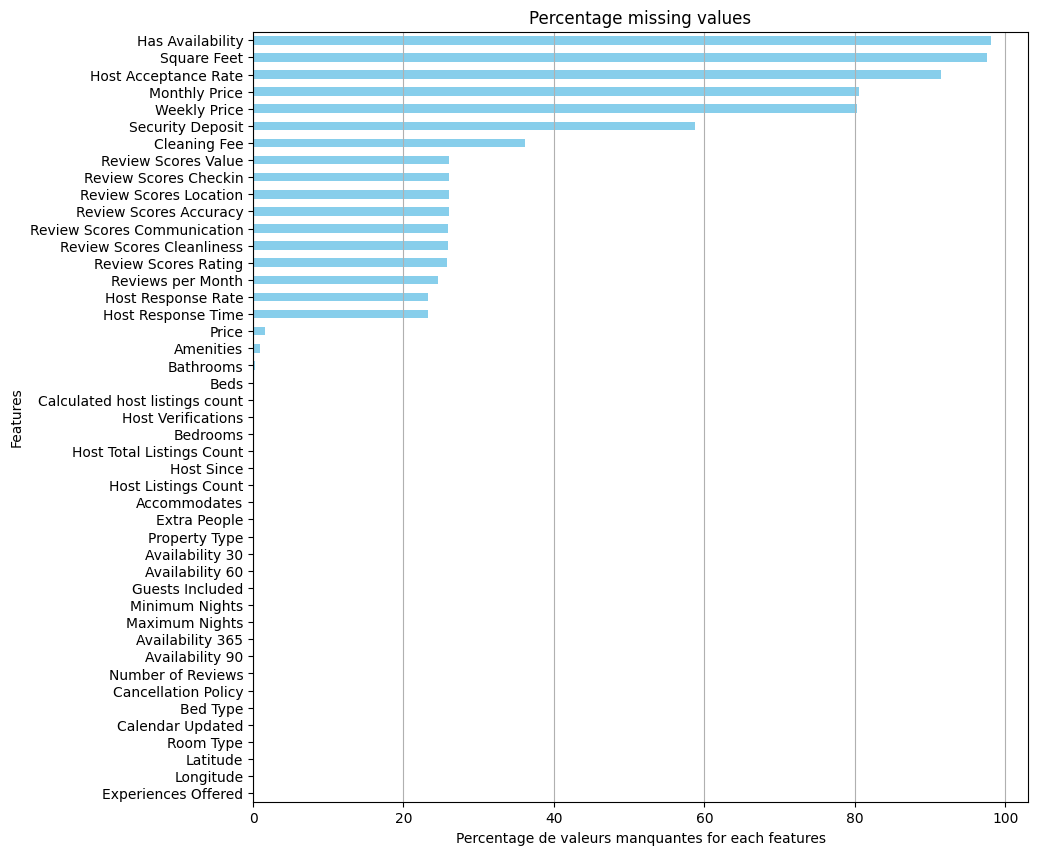

In [24]:
display_missing_values()

We can observe that each feature in our dataset has missing values except for only the  ``Experiences Offered`` attribute. So we have to deal with them all.

Our primary goal is to predict the price of our accommodations. Therefore, it is crucial that all rows have the price specified. This is why I have decided to drop the rows that do not have information on the price.

In [25]:
dataset.dropna(subset=['Price'], inplace=True)

We can observe that there are many missing values for our dependent variables ``Monthly Price`` and ``Weekly Price``. Therefore, I have decided to impute values for these features using the price multiplied by the number of days

In [26]:
dataset['Monthly Price'] = dataset['Monthly Price'].fillna(dataset['Price'] * 30.5)

In [27]:
dataset['Weekly Price'] = dataset['Weekly Price'].fillna(dataset['Price'] * 7)

To enhance the quality of our data, I have made the decision to drop columns that exhibit more than 50% missing values. The presence of a significant number of missing values can compromise the integrity of our analyses and the accuracy of our models. 

In [28]:
dataset.dropna(axis=1, thresh=0.5 * len(dataset), inplace=True)

For all the review scores, I have chosen to handle missing values by imputing the most frequently occurring value. This imputation strategy is particularly useful when dealing with ordinal data.

In [29]:
review_score_columns = ['Review Scores Value', 'Review Scores Checkin', 'Review Scores Location', 'Review Scores Accuracy', 'Review Scores Communication', 'Review Scores Cleanliness', 'Review Scores Rating']
for review_score_name in review_score_columns:
    most_frequent_value = dataset[review_score_name].mode()[0]
    dataset[review_score_name].fillna(most_frequent_value, inplace=True)

In addition, for missing values in the ``Host Since`` column, I have chosen to impute the most frequently occurring value. 

In [30]:
most_frequent_host_since = dataset['Host Since'].mode()[0]
dataset['Host Since'].fillna(most_frequent_host_since, inplace=True)

I have decided to impute the value of 0 to the missing values of ``Number of Reviews``, indicating that the accommodation has not received any reviews in cases where the field is not filled.

In [31]:
dataset['Number of Reviews'].fillna(0, inplace=True)

To impute values for ``Reviews per Month``, I have decided to examine whether the accommodation has received reviews:
- If it has never received any reviews, I assign it the value of 0.
- If it has received reviews, I calculate the number of months between the accommodation's ``Host Since`` date and the latest ``Host Since`` date in the entire dataset. Then, I divide the number of reviews by the calculated number of months.

Here, we are adding a temporary column, ``Months Since Hosting``, which calculates the number of months since the listing has been on the market. This helps avoid performing calculations row by row, thus speeding up the process. We will drop it right after.

In [32]:
latest_host_since = dataset['Host Since'].max()
dataset['Months Since Hosting'] = (pd.to_datetime(latest_host_since) - pd.to_datetime(dataset['Host Since'])).dt.days // 30.5

In [33]:
def calculate_reviews_per_month(row):
    if pd.notna(row['Reviews per Month']):
        return row['Reviews per Month']
    
    nb_review = row['Number of Reviews']
    nb_months_since_hosting = row['Months Since Hosting']

    if pd.isnull(nb_review) or nb_months_since_hosting <= 0:
        return 0
    else:
        return nb_review / nb_months_since_hosting

In [34]:
dataset['Reviews per Month'] = dataset.apply(calculate_reviews_per_month, axis=1)

In [35]:
dataset.drop('Months Since Hosting', axis=1, inplace=True)

Now, let's turn our attention to the ``Amenities`` attribute. Each provided value appears as a string where individual amenities are separated by commas. I assume that accommodations with missing data do not have any amenities, so I fill in the missing values with an empty string.

In [36]:
dataset['Amenities'].fillna('', inplace=True)

For each feature related to availability, guest count, listing count, and the number of rooms/beds/bathrooms, cleaning fee, I have opted to impute the median value, as these are numerical variables and to ensures that we fill in missing values with a representative value. The median, being the middle value in a sorted dataset, is less influenced by extreme values compared to the mean, especially when dealing with ordinal values. 

In [37]:
columns_name_impute_median = ['Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Bathrooms', 'Beds', 'Bedrooms', 'Calculated host listings count', 'Host Total Listings Count', 'Host Listings Count', 'Maximum Nights', 'Minimum Nights', 'Guests Included', 'Extra People', 'Accommodates', 'Cleaning Fee', 'Host Response Rate']
for col_name in columns_name_impute_median:
    available_median = dataset[col_name].median()
    dataset[col_name].fillna(available_median, inplace=True)

As for attributes such as ``Host Verifications``, ``Host Response Time``, ``Property Type``, and ``Cancellation Policy``, being categorical variables, I have chosen to impute their missing values with the most frequently occurring values

In [38]:
for col_name in ['Host Verifications', 'Host Response Time', 'Property Type', 'Cancellation Policy']:
    most_frequent_value = dataset[col_name].mode()[0]
    dataset[col_name].fillna(most_frequent_value, inplace=True)

Let's check again our missing values.

Missing Values :
Experiences Offered               0.0
Guests Included                   0.0
Minimum Nights                    0.0
Maximum Nights                    0.0
Calendar Updated                  0.0
Availability 30                   0.0
Availability 60                   0.0
Availability 90                   0.0
Availability 365                  0.0
Number of Reviews                 0.0
Review Scores Rating              0.0
Review Scores Accuracy            0.0
Review Scores Cleanliness         0.0
Review Scores Checkin             0.0
Review Scores Communication       0.0
Review Scores Location            0.0
Review Scores Value               0.0
Cancellation Policy               0.0
Calculated host listings count    0.0
Extra People                      0.0
Cleaning Fee                      0.0
Host Since                        0.0
Monthly Price                     0.0
Host Response Time                0.0
Host Response Rate                0.0
Host Listings Count              

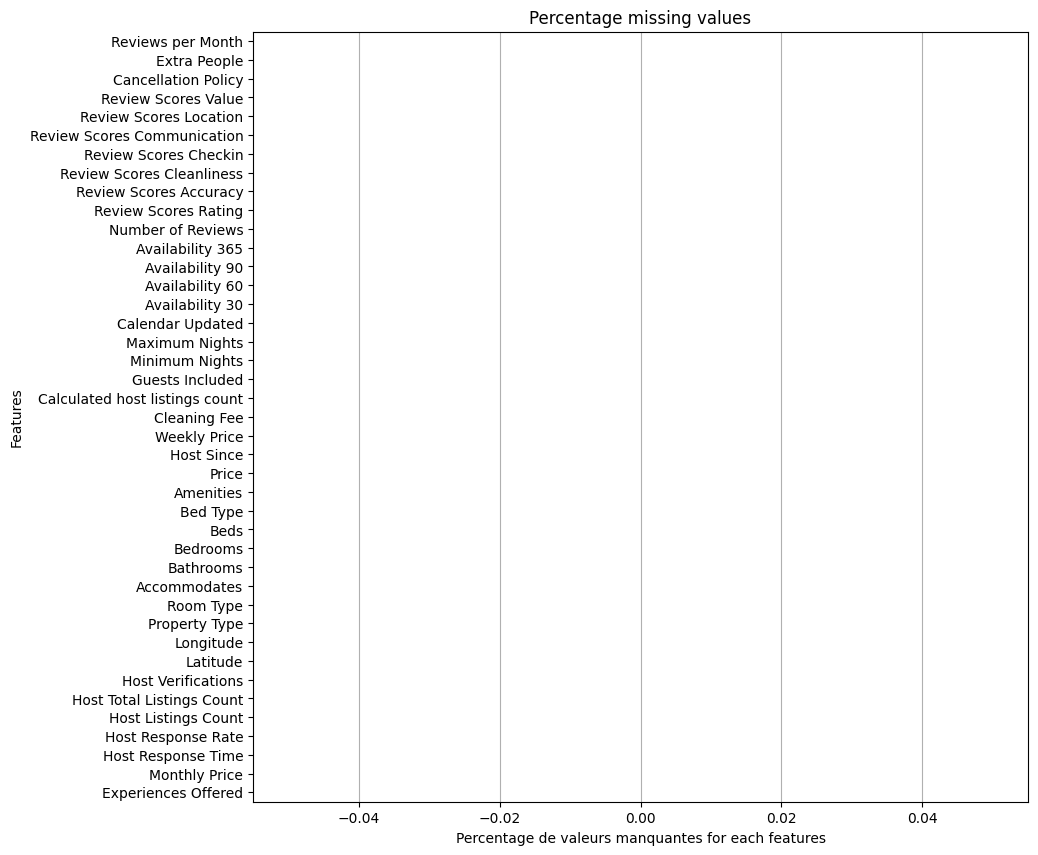

In [39]:
display_missing_values()

Now, we don't have missing values anymore.

### 2.7 Drop Unnecessary Columns

## 3. Exploratory Data Analysis

### 3.1 Univariate Analysis

### 3.2 Bivariate Analysis
#### 3.2.1 Numerical-Numerical Variable

#### 3.2.2 Categorical-Numerical Variable

## 4. Data Preprocessing
### 4.1 Transformation of Distributions

### 4.2 Feature Engineering
#### 4.2.1 Creating New Features

#### 4.2.2 Feature Scaling

#### 4.2.3 Encoding Categorical Variables
##### 4.2.3.1 Label Encoding

##### 4.2.3.2 One Hot Encoding

### 4.3 Data Splitting (Train-Test-Validation)

## 5. The model
### 5.1 Model Building

### 5.2 Model Training

### 5.3 Model Evaluation
#### 5.3.1 K-Fold Cross Validation

#### 5.3.2 Hyperparameter Tunning

#### 5.3.3 Re-train with optimal hyperparameters for predictions

#### 5.3.4 Feature Importance

#### 5.3.5 Learning Curves

### 5.4 Test the model on Test Set

## 6. Conclusion
### 6.1 Results of the project / Validating hypothesis
...
### 6.2 Improvements
...
### 6.3 Conclusion on the project / course
...